# Voter Models

Rock the vote!

## What we will accomplish

In this notebook we will:

- Discuss voter models.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

We will cast this in the light of classification, but will mention how it works for regression later in the notebook.

Let's say that you have a few different classifiers that you think are pretty good, for instance a logistic regression model, a knn model, a support vector machine, and a random forest model.

A voting classifier is one that looks at how each of your classifiers decides to classify a point and goes with the decision that receives the most "votes".

Let's see how to implement this model type. We will be using the `VotingClassifier` object from `sklearn`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html</a>.

In [2]:
np.random.seed(4930)

X = np.zeros((200,2))
X[:,0] = np.random.random(200)
X[:,1] = np.random.random(200)

y = np.zeros(200)
y[X[:,0]-X[:,1]>=0] = 1

## for predictions
xx1, xx2 = np.meshgrid(np.arange(-.01, 1.01, .01),
                          np.arange(-.01, 1.01, .01))

X_pred = np.zeros((len(xx1.reshape(-1,1)), 2))
X_pred[:,0] = xx1.flatten()
X_pred[:,1] = xx2.flatten()

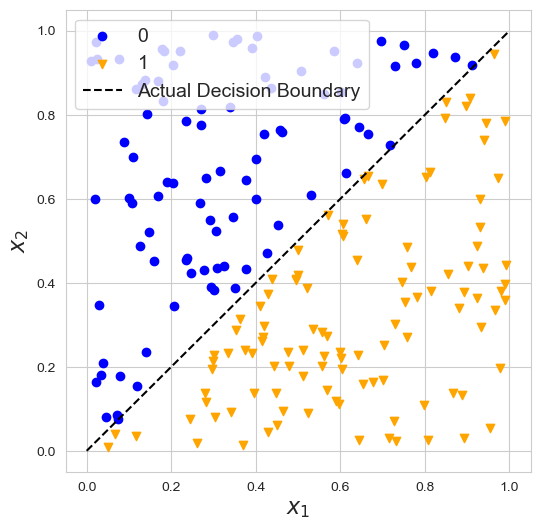

In [3]:
plt.figure(figsize = (6,6))
plt.scatter(X[y == 0,0], 
            X[y == 0,1],
            c='blue',
            label="0")
plt.scatter(X[y == 1,0], 
            X[y == 1,1],
            c='orange',
            marker='v',
            label="1")


plt.plot([0,1],
         [0,1],
         'k--',
         label="Actual Decision Boundary")


plt.xlabel("$x_1$",fontsize = 16)
plt.ylabel("$x_2$",fontsize = 16)
plt.legend(fontsize='14', loc=2)

plt.show()

In [4]:
## import base classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

## The VotingClassifier
from sklearn.ensemble import VotingClassifier

## import accuracy metric
from sklearn.metrics import accuracy_score

In [5]:
## Make Base Models
## logistic regression
log = LogisticRegression()

## random forest
rf = RandomForestClassifier(n_estimators = 250,
                               max_depth=3,
                               random_state = 30)

## svm
svm = LinearSVC()

## knn
knn = KNeighborsClassifier(15)


In [6]:
## make the voting classifier
## it is very similar to a pipeline's syntax

voting = VotingClassifier([('log', LogisticRegression()),
                              ('rf', RandomForestClassifier(n_estimators = 250,
                                       max_depth=3,
                                       random_state = 30)),
                              ('svm', LinearSVC()),
                              ('knn', KNeighborsClassifier(15))],
                         voting='hard')

log_clf training set accuracy 0.96


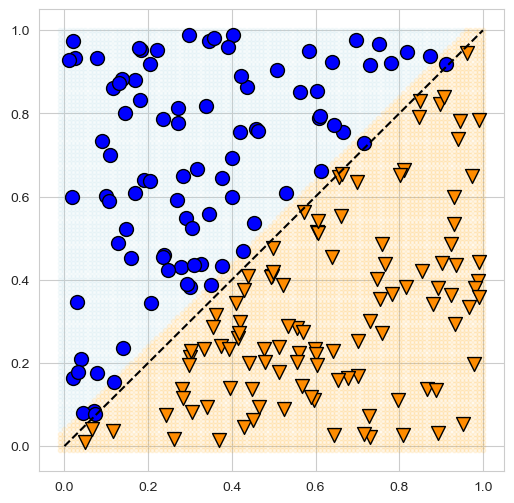



rf_clf training set accuracy 1.0


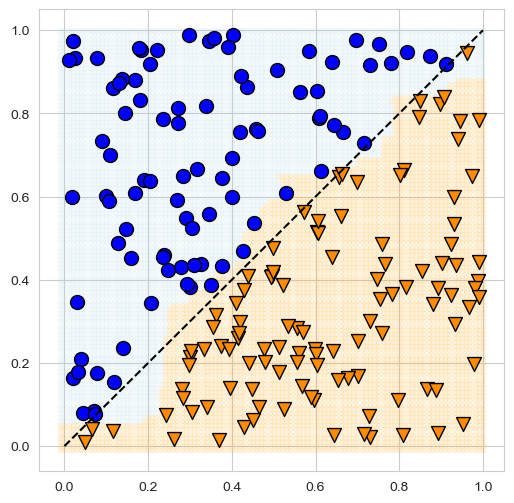



svm_clf training set accuracy 0.99


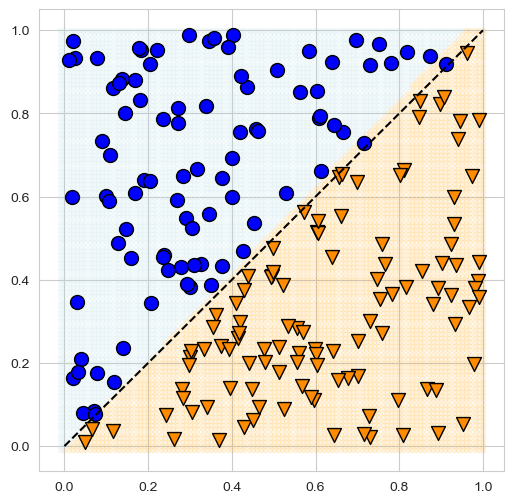



knn_clf training set accuracy 0.955


/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimina

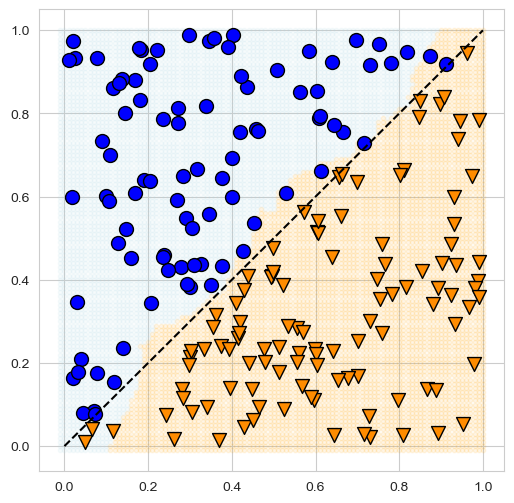



voting_clf training set accuracy 0.99


/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/matthewosborne/miniforge3/envs/home_env/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimina

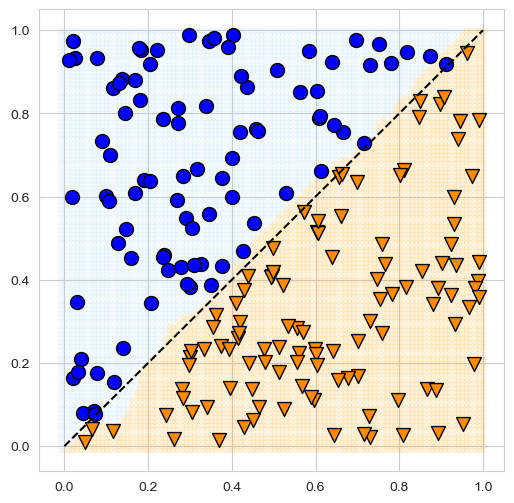

In [7]:
# print each classifier's accuracy

for name,clf in (["log_clf",log],["rf_clf",rf],
                 ["svm_clf",svm],["knn_clf",knn],
                 ["voting_clf",voting]):
    # fit the model
    clf.fit(X, y)
    
    # predict
    y_pred = clf.predict(X)
    
    # get acc
    acc = sum(y == y_pred)/len(y_pred)
    
    print(name,"training set accuracy",np.round(acc,5))
    preds = clf.predict(X_pred)
    
    plt.figure(figsize=(6,6))
    
    
    plt.scatter(X_pred[preds==1,0],
                X_pred[preds==1,1],
                alpha=.1,
                c='orange',
                s=10)
    plt.scatter(X_pred[preds==0,0],
                X_pred[preds==0,1],
                alpha=.1,
                c='lightblue',
                s=10)

    plt.scatter(X[y==1,0], 
                X[y==1,1],
                label='Training 0',
                c = 'darkorange',
                marker='v',
                edgecolor='black',
                s=100)
    plt.scatter(X[y==0,0], 
                X[y==0,1],
                label='Training 1',
                c = 'blue',
                edgecolor='black',
                s=100)
    plt.plot([0,1],
             [0,1],
             'k--')
    
    plt.show()
    print()
    print()

#### Hard voting vs soft voting

You can notice that we included the argument `voting = "hard"` when we defined our voting classifier. When this is your voting method, the prediction is decided according to the majority vote of the individual classifiers. For example, if 3 out of 4 possible classifiers classify the observation a `1`, then the voter model classifies it as a `1`.

The other option is to set `voting = "soft"`. For this type of voting classifier predictions are chosen according to the probabilities assigned by each of the constituent classifiers. For each observation the soft voter assigns the class, $c$, for which:

$$
\sum_{j=1}^V P_j(y_i = c | X_i)
$$

is largest, where $P_j$ denotes the probability according to voting classifier $j$ of $V$ possible classifiers.

#### Weights

Note that you can also perform weighted voting of the classifiers with the `weights` argument. This would assign some classifiers more pull in deciding the predicted class than others.

### Voter models for regression

Voter models can also be made using an ensemble of independent regression models. Crucially, this does not mean that you should build several linear regression models with slightly different features and then feed them into a voter model. Instead you should build a handful of <i>unique</i> regression models for example a:
- Linear regression model,
- $k$NN regression model,
- Support vector regressor and
- Random forest regressor.

The voter regression model takes the average (or weighted average) of all of the regression models fed into it to make a prediction. It can be implemented with `VotingRegressor` from `sklearn.ensemble`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html</a>.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)